In [1]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd

# Define paths
train_csv = "../chexpert/versions/1/train.csv"
train_dir = "../chexpert/versions/1/train/"
test_csv = "../chexpert/versions/1/valid.csv"
test_dir = "../chexpert/versions/1/valid/"

## Collect file paths from train.csv file

223414 images found...


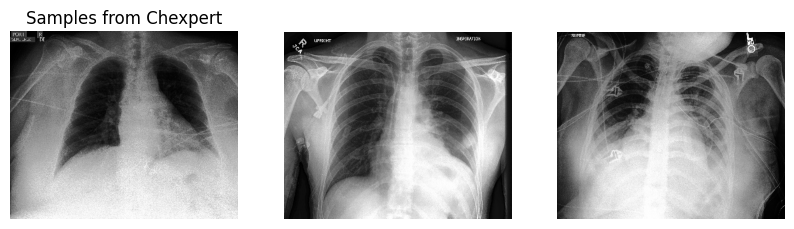

In [12]:
df = pd.read_csv(train_csv)
filepaths = list(df.iloc[:, 0])
print(f"{len(filepaths)} images found...")
# display images
plt.figure(figsize=(10,10))
img = cv2.imread(filepaths[0])
plt.subplot(331);plt.imshow(img);plt.axis(False);plt.title("Samples from Chexpert")
img = cv2.imread(filepaths[10])
plt.subplot(332);plt.imshow(img);plt.axis(False);
img = cv2.imread(filepaths[30])
plt.subplot(333);plt.imshow(img);plt.axis(False);

## Save images in chexpert_images folder

In [35]:
import os

savepath = "../chexpert/versions/1/chexpert_images/"
if(not os.path.exists(savepath)):
    os.makedirs(savepath)

In [36]:
from tqdm import tqdm

count = 0
for path in tqdm(filepaths[:100000]):
    tmp = savepath + f"{count}".zfill(6)+".png"
    # StyleGAN requirements: Images must be a squared and a power of 2
    # downsample images from 389x320 --> 256x256 (required for tfrecords)
    cv2.imwrite(tmp, cv2.resize(cv2.imread(path), (256, 256)))
    count+=1

100%|██████████| 100000/100000 [11:04<00:00, 150.55it/s]


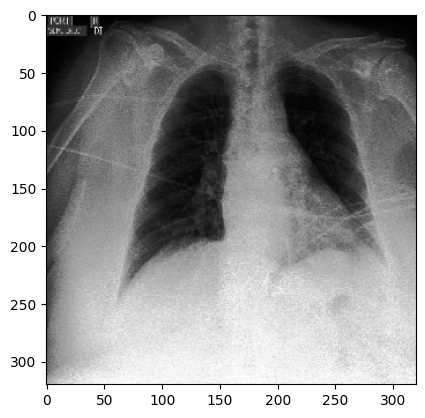

In [30]:
img = cv2.resize(cv2.imread(filepaths[0]), (320, 320))
plt.imshow(img)